<a href="https://colab.research.google.com/github/mishaisran/DATA-690-WANG/blob/master/Assignment7/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment 07

**You can use the local Jupyter environment if you are not comfortable with Colab for this assignment.**

The first half of this assignment is a repeat of assignment 05.

This gives you a chance to refresh.

The second half is new and gives you a chance to perform additional practices.

You also get a chance to use some of the Python libraries and techniques.

You will unzip the zip file manually in preparation for this assignment.

The link to the zip file is (you have already used it in your assignment 5):

https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip

After unzipping, You will have all files in one folder named "CollegeScorecard_Raw_Data" 

The folder contains the yearly data files from 1996 to 2019 school years.

if you are using your local environment, I suggest you create a new folder call "Assignment7" and place the Notebook file and the data folder under it.
```
Assignment7/
    - assignment_07.ipynb
    - CollegeScorecard_Raw_Data/
        - ...
        - 'MERGED1996_97_PP.csv',
        - 'MERGED2015_16_PP.csv',
        - ...
        - 'MERGED2017_18_PP.csv'
```


In [ ]:
# <1> 
# Import libraries

#(Write code here)
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/CollegeScorecard_Raw_Data/'
os.chdir(path)

In [ ]:
# <2> 
# Display the current workin directory using os.getcwd()
# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder

#(Write code here)
os.getcwd()

'/content/drive/My Drive/CollegeScorecard_Raw_Data'

In [ ]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder.
# use this method to assign the contents (list of file names) of the data folder to a variable and display it.
# # You can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder

#(Write code here)
os.listdir
dirs = os.listdir(path)

# This would print all the files and directories
for file in dirs:
   print(file)

MERGED2011_12_PP.csv
MERGED1999_00_PP.csv
MERGED2006_07_PP.csv
MERGED2014_15_PP.csv
.DS_Store
MERGED2003_04_PP.csv
MERGED1996_97_PP.csv
FieldOfStudyData1516_1617_PP.csv
MERGED2012_13_PP.csv
MERGED2005_06_PP.csv
MERGED2009_10_PP.csv
MERGED2017_18_PP.csv
MERGED2018_19_PP.csv
Crosswalks.zip
MERGED2001_02_PP.csv
MERGED2000_01_PP.csv
MERGED2016_17_PP.csv
MERGED1997_98_PP.csv
MERGED1998_99_PP.csv
data.yaml
MERGED2002_03_PP.csv
MERGED2004_05_PP.csv
MERGED2015_16_PP.csv
MERGED2013_14_PP.csv
MERGED2007_08_PP.csv
MERGED2008_09_PP.csv
FieldOfStudyData1415_1516_PP.csv
MERGED2010_11_PP.csv
all.txt


In [ ]:
# <4> 
# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.

#(Write code here)
csv_files = [x for x in dirs if '.csv' and 'MERGED' in x]
csv_files

['MERGED2011_12_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2010_11_PP.csv']

In [ ]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

# The following function extracts the year of each file from its name.
def year_col(x):
    b = x.find('_')
    y = int(x[:b].replace('MERGED',''))
    return y

cols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]
df = []

for k in csv_files:
    year = year_col(k)
    colleges = pd.read_csv(path+k, usecols=cols)
    colleges['Year'] = year
    df.append(colleges)
    
colleges.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
0,100636,Community College of the Air Force,AL,0,NaN,NaN,2010
1,100654,Alabama A & M University,AL,5,0.5129,5800.0,2010
2,100663,University of Alabama at Birmingham,AL,5,0.8243,5806.0,2010
3,100690,Amridge University,AL,5,0.7143,8360.0,2010
4,100706,University of Alabama in Huntsville,AL,5,0.6614,7492.0,2010


In [ ]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)
colleges_df = pd.concat(df)
colleges_df.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
5201,405988,University of Phoenix-Colorado Campus,CO,7.0,NaN,12335.0,2008
3605,207856,Southwestern Christian University,OK,6.0,0.7727,7200.0,2001
1545,157669,Empire Beauty School-Dixie,KY,5.0,NaN,NaN,2011
816,140818,Piedmont College,GA,5.0,0.5961,25920.0,2018
5993,421708,Arizona College-Glendale,AZ,6.0,NaN,NaN,2002


In [ ]:
colleges_df.shape

(163331, 7)

In [ ]:
colleges_df.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
7465,45896402,Strayer University-Charleston Campus,SC,5.0,NaN,14085.0,2010
7466,45897301,Strayer University-Irving,TX,6.0,NaN,14085.0,2010
7467,45897302,Strayer University-Katy,TX,6.0,NaN,14085.0,2010
7468,45897303,Strayer University-Northwest Houston,TX,6.0,NaN,14085.0,2010
7469,45897304,Strayer University-Plano,TX,6.0,NaN,14085.0,2010


In [ ]:
def NaN_percent(colleges_df, column_name):
    row_count = colleges_df[column_name].shape[0]
    empty_values = row_count - colleges_df[column_name].count()
    return (100.0*empty_values)/row_count
    
for i in list(colleges_df):
    print(i +': ' + str(NaN_percent(colleges_df,i))+'%')

UNITID: 0.0%
INSTNM: 0.0%
STABBR: 0.0%
REGION: 0.0006122536444398186%
ADM_RATE: 72.50307657456331%
TUITIONFEE_IN: 51.51318488223301%
Year: 0.0%


In [ ]:
colleges_df.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN,Year
count,1.633310e+05,163330.000000,44911.000000,79194.000000,163331.000000
mean,9.432395e+05,4.554693,0.692946,11665.505367,2007.249481
std,4.571721e+06,2.189217,0.217062,9985.998016,6.608266
min,1.006360e+05,0.000000,0.000000,0.000000,1996.000000
25%,1.633380e+05,3.000000,0.555000,3776.000000,2002.000000
50%,2.127800e+05,5.000000,0.717500,9285.000000,2008.000000
75%,4.075680e+05,6.000000,0.857100,16146.000000,2013.000000
max,4.914640e+07,9.000000,1.000000,74787.000000,2018.000000


In [ ]:
# <7>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

#(Write code here)
UMBC_df = colleges_df[colleges_df['INSTNM'].str.contains('University of Maryland-Baltimore County')]
UMBC_df.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
1694,163268,University of Maryland-Baltimore County,MD,2.0,0.6081,9467.0,2011
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1799,163268,University of Maryland-Baltimore County,MD,2.0,0.7153,8622.0,2006
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003


In [ ]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

#(Write code here)
UMBC_df.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
1799,163268,University of Maryland-Baltimore County,MD,2.0,0.7153,8622.0,2006
1660,163268,University of Maryland-Baltimore County,MD,2.0,0.6035,9764.0,2012
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
1779,163268,University of Maryland-Baltimore County,MD,2.0,0.6895,8708.0,2007
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014


In [ ]:
UMBC_df.shape

(23, 7)

In [ ]:
UMBC_df.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
1694,163268,University of Maryland-Baltimore County,MD,2.0,0.6081,9467.0,2011
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1799,163268,University of Maryland-Baltimore County,MD,2.0,0.7153,8622.0,2006
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003


In [ ]:
UMBC_df.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
1555,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015
1629,163268,University of Maryland-Baltimore County,MD,2.0,0.6315,10068.0,2013
1779,163268,University of Maryland-Baltimore County,MD,2.0,0.6895,8708.0,2007
1767,163268,University of Maryland-Baltimore County,MD,2.0,0.7174,8780.0,2008
1710,163268,University of Maryland-Baltimore County,MD,2.0,0.6589,9171.0,2010


In [ ]:
UMBC_df.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN,Year
count,23.0,23.0,18.000000,19.000000,23.00000
mean,163268.0,2.0,0.640694,9004.842105,2007.00000
std,0.0,0.0,0.052728,1825.795421,6.78233
min,163268.0,2.0,0.568300,5490.000000,1996.00000
25%,163268.0,2.0,0.597600,8270.000000,2001.50000
50%,163268.0,2.0,0.632100,8872.000000,2007.00000
75%,163268.0,2.0,0.689375,10226.000000,2012.50000
max,163268.0,2.0,0.717400,11778.000000,2018.00000


Text(0, 0.5, 'In-state Tuition in USD')

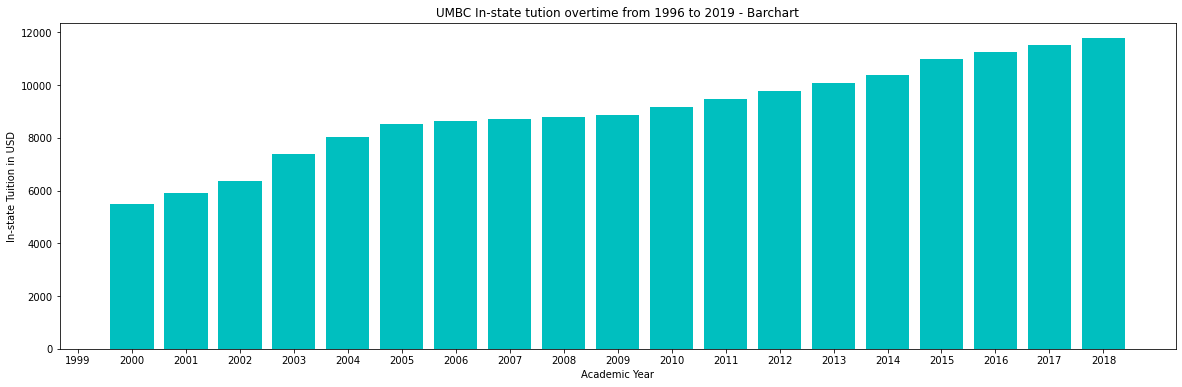

In [ ]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart

#(Write code here)
UMBC_df = UMBC_df.sort_values(by='Year', ascending=True)

UMBC_x_list = UMBC_df.Year.apply(str).tolist()
UMBC_y_list = UMBC_df.TUITIONFEE_IN.tolist()

fig, ax = plt.subplots(figsize=(20,6))

ax.bar(UMBC_x_list, UMBC_y_list,color='c')
ax.set_title("UMBC In-state tution overtime from 1996 to 2019 - Barchart")
ax.set_xlabel("Academic Year")
ax.set_ylabel("In-state Tuition in USD")

Text(0, 0.5, 'In-state Tuition in USD')

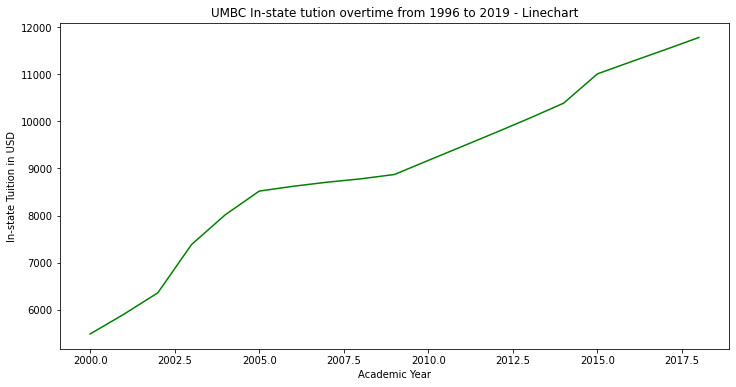

In [ ]:
# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart

#(Write code here)
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(UMBC_df.Year,UMBC_df.TUITIONFEE_IN,color='g')
ax.set_title("UMBC In-state tution overtime from 1996 to 2019 - Linechart")
ax.set_xlabel("Academic Year")
ax.set_ylabel("In-state Tuition in USD")

In [ ]:
# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List
# Loop through the list and calculate the % change each year over the prior year
# This takes some effort. Not hard, just some abstract/logical thinking and some experiments
# Have fun on this one

 #(Write code here)
UMBC_df.sort_values(['Year'], ascending=[True], inplace=True)
UMBC_df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005


In [ ]:
UMBC_df['Pct_Change'] = UMBC_df['TUITIONFEE_IN'].pct_change(periods=1, fill_method='pad')
UMBC_df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year,Pct_Change
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996,NaN
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997,NaN
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998,NaN
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999,NaN
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000,NaN
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001,0.076503
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002,0.076481
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003,0.161270
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004,0.085544
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005,0.062344


In [ ]:
UMBC_df['Pct_Change'] = UMBC_df['Pct_Change'].apply(lambda x: x*100)
UMBC_df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year,Pct_Change
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996,NaN
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997,NaN
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998,NaN
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999,NaN
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000,NaN
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001,7.650273
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002,7.648054
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003,16.127004
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004,8.554413
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005,6.234414


In [ ]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
# Not as hard as you may think. If you get stuck, you think too hard. 
# Google it and you will find the answer.

#(Write code here)
UMBC_df['Pct_Change'] = UMBC_df['Pct_Change'].round(2)
UMBC_df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year,Pct_Change
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996,NaN
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997,NaN
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998,NaN
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999,NaN
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000,NaN
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001,7.65
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002,7.65
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003,16.13
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004,8.55
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005,6.23


Text(0, 0.5, 'In-state Tuition in USD')

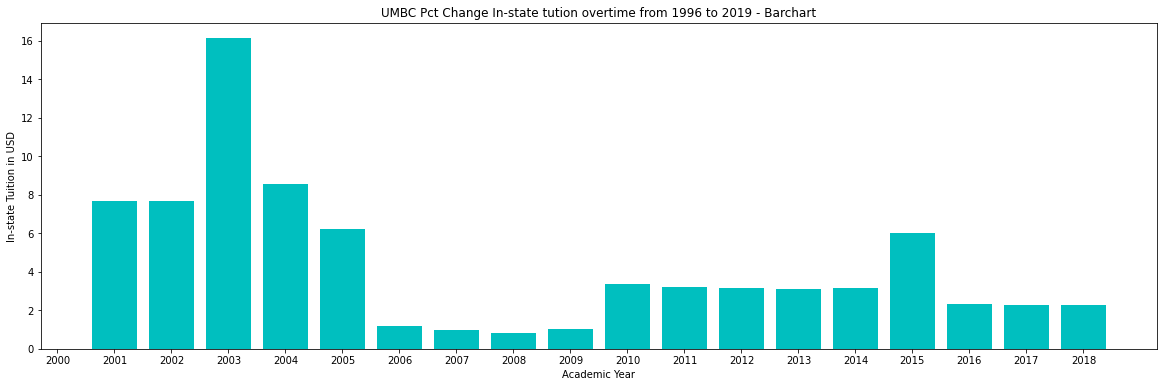

In [ ]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart

# (write code here) 
UMBC_df = UMBC_df.sort_values(by='Year', ascending=True)

UMBC_x_list2 = UMBC_df.Year.apply(str).tolist()
UMBC_y_list2 = UMBC_df.Pct_Change.tolist()

fig, ax = plt.subplots(figsize=(20,6))

ax.bar(UMBC_x_list2, UMBC_y_list2,color='c')
ax.set_title("UMBC Pct Change In-state tution overtime from 1996 to 2019 - Barchart")
ax.set_xlabel("Academic Year")
ax.set_ylabel("In-state Tuition in USD")

Text(0, 0.5, 'In-state Tuition in USD')

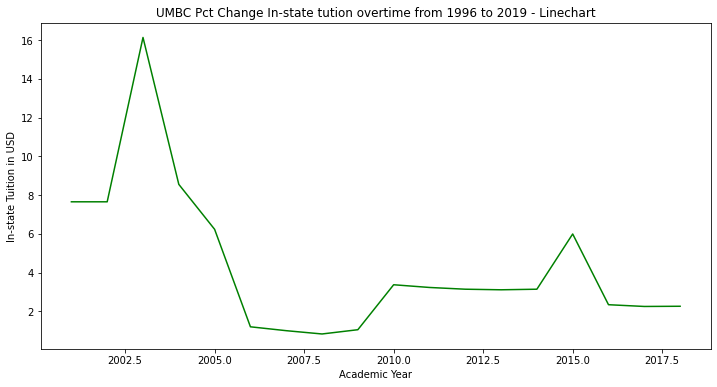

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(UMBC_df.Year,UMBC_df.Pct_Change,color='g')
ax.set_title("UMBC Pct Change In-state tution overtime from 1996 to 2019 - Linechart")
ax.set_xlabel("Academic Year")
ax.set_ylabel("In-state Tuition in USD")

In [ ]:
# <12>
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later 

#(Write code here)
def Percent_change(df):
  df['Pct_Change'] = df['TUITIONFEE_IN'].pct_change(periods=1, fill_method='pad')
  df['Pct_Change'] = df['Pct_Change'].apply(lambda x: x*100)
  df['Pct_Change'] = df['Pct_Change'].round(2)
  return df  
 

In [ ]:
# <13>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

#(Write code here)
JHU_df = colleges_df[colleges_df['INSTNM'].str.contains('Johns Hopkins')]
JHU_df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
1687,162928,Johns Hopkins University,MD,2.0,0.1940,42280.0,2011
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999
1792,162928,Johns Hopkins University,MD,2.0,0.2792,33900.0,2006
1603,162928,Johns Hopkins University,MD,2.0,0.1608,47060.0,2014
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996
1653,162928,Johns Hopkins University,MD,2.0,0.1843,43390.0,2012
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005
1738,162928,Johns Hopkins University,MD,2.0,0.2782,39150.0,2009
1473,162928,Johns Hopkins University,MD,2.0,0.1254,52170.0,2017


Text(0, 0.5, 'In-state Tuition in USD')

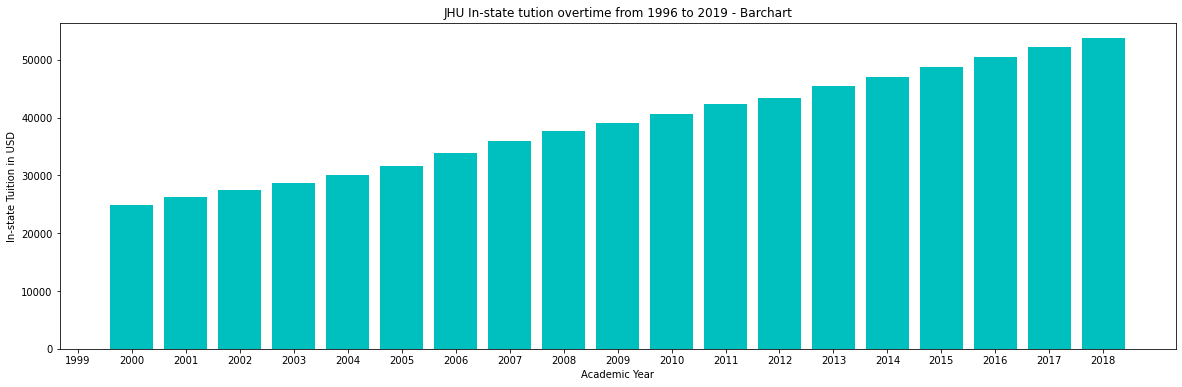

In [ ]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together

#(Write code here)
JHU_df = JHU_df.sort_values(by='Year', ascending=True)

JHU_x_list = JHU_df.Year.apply(str).tolist()
JHU_y_list = JHU_df.TUITIONFEE_IN.tolist()

fig, ax = plt.subplots(figsize=(20,6))

ax.bar(JHU_x_list, JHU_y_list,color='c')
ax.set_title("JHU In-state tution overtime from 1996 to 2019 - Barchart")
ax.set_xlabel("Academic Year")
ax.set_ylabel("In-state Tuition in USD")

In [ ]:
# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier

#(Write code here)
Percent_change(JHU_df)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year,Pct_Change
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996,NaN
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997,NaN
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998,NaN
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999,NaN
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000,NaN
1906,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001,5.13
1884,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002,4.50
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003,4.89
1823,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004,4.91
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005,4.91


In [ ]:
# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

#(Write code here)
#Already incorporated in the function

Text(0, 0.5, 'In-state Tuition in USD')

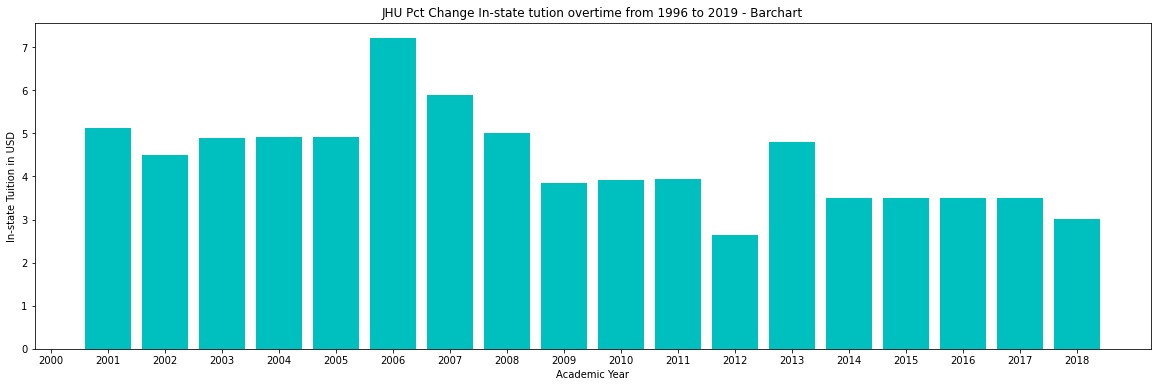

In [ ]:
# <17> Make a bar plot of the JHU percentage changes tuitions over time

#(Write code here)
JHU_df = JHU_df.sort_values(by='Year', ascending=True)

JHU_x_list2 = JHU_df.Year.apply(str).tolist()
JHU_y_list2 = JHU_df.Pct_Change.tolist()

fig, ax = plt.subplots(figsize=(20,6))

ax.bar(JHU_x_list2, JHU_y_list2,color='c')
ax.set_title("JHU Pct Change In-state tution overtime from 1996 to 2019 - Barchart")
ax.set_xlabel("Academic Year")
ax.set_ylabel("In-state Tuition in USD")

In [ ]:
# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.

#(Write code here)
UMBC_tpctchange = UMBC_df[['Year','Pct_Change']]
UMBC_tpctchange.rename(columns = {'Pct_Change':'UMBC_PCT'}, inplace = True)
UMBC_tpctchange

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Year,UMBC_PCT
2151,1996,NaN
2049,1997,NaN
1982,1998,NaN
1955,1999,NaN
1926,2000,NaN
1915,2001,7.65
1893,2002,7.65
1873,2003,16.13
1830,2004,8.55
1819,2005,6.23


In [ ]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

#(Write code here)
JHU_tpctchange = JHU_df[['Year','Pct_Change']]
JHU_tpctchange.rename(columns = {'Pct_Change':'JHU_PCT'}, inplace = True)
JHU_tpctchange

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Year,JHU_PCT
2139,1996,NaN
2039,1997,NaN
1973,1998,NaN
1946,1999,NaN
1917,2000,NaN
1906,2001,5.13
1884,2002,4.50
1865,2003,4.89
1823,2004,4.91
1812,2005,4.91


In [ ]:
# Now, merger the two data frames
# and display the new dataframe

#(Write code here)
UMBC_JHU_tpctchange = pd.merge(UMBC_tpctchange,JHU_tpctchange, on = 'Year')
UMBC_JHU_tpctchange

,Year,UMBC_PCT,JHU_PCT
0,1996,NaN,NaN
1,1997,NaN,NaN
2,1998,NaN,NaN
3,1999,NaN,NaN
4,2000,NaN,NaN
5,2001,7.65,5.13
6,2002,7.65,4.50
7,2003,16.13,4.89
8,2004,8.55,4.91
9,2005,6.23,4.91


Text(0, 0.5, 'Tuition Growth Rate (%)')

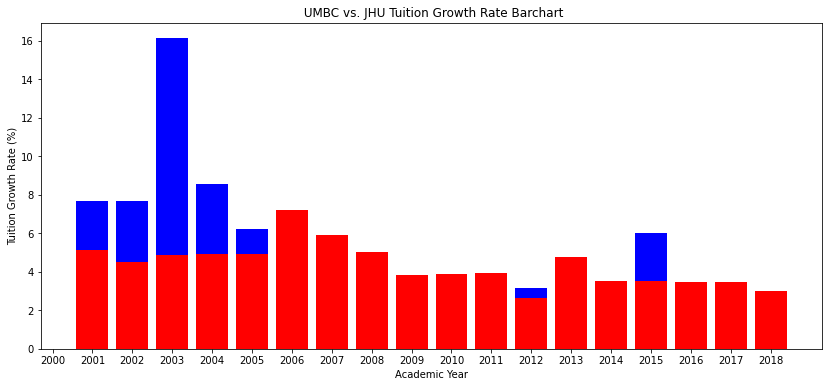

In [ ]:
# Plot UMBC and JHU separately on the same plot 
# However, this does not work since the bars overlap.

#(Write code here)
x_list = UMBC_JHU_tpctchange.Year.apply(str).tolist()

fig, ax = plt.subplots(figsize=(14,6))

ax.bar(x_list,UMBC_JHU_tpctchange.UMBC_PCT,color = 'b')
ax.bar(x_list,UMBC_JHU_tpctchange.JHU_PCT,color = 'r')
ax.set_title(" UMBC vs. JHU Tuition Growth Rate Barchart")
ax.set_xlabel("Academic Year")
ax.set_ylabel("Tuition Growth Rate (%)")

Text(0, 0.5, 'Rate of Tuition Growth (%)')

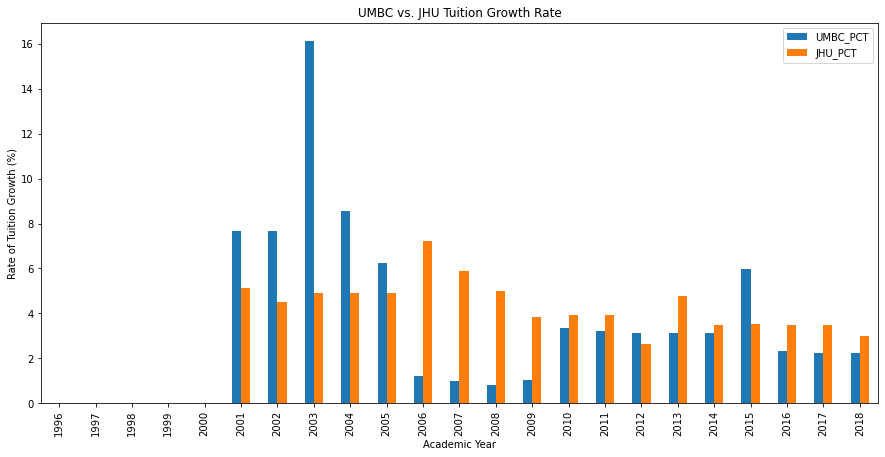

In [ ]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

#(Write code here)
UMBC_JHU_tpctchange.plot.bar('Year',y = ['UMBC_PCT','JHU_PCT'], figsize=(15,7), 
                     title='UMBC vs. JHU Tuition Growth Rate')
plt.xlabel('Academic Year')
plt.ylabel('Rate of Tuition Growth (%)')

Text(0, 0.5, 'Rate of Tuition Growth (%)')

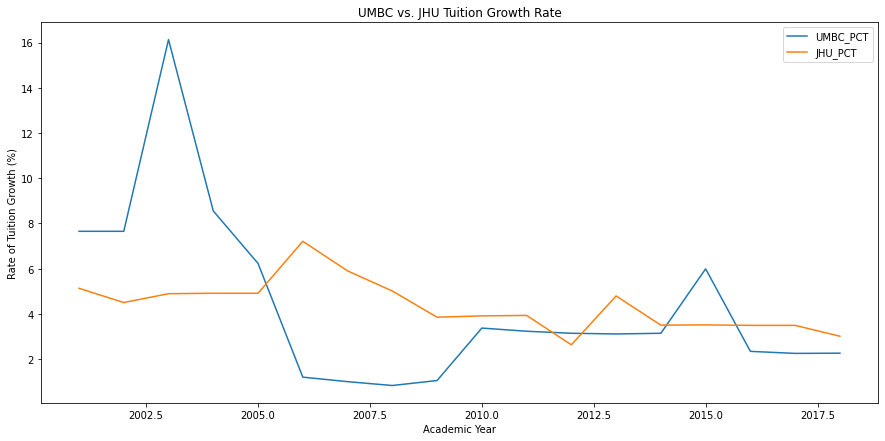

In [ ]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

#(Write code here)
UMBC_JHU_tpctchange.plot('Year',y=['UMBC_PCT','JHU_PCT'], figsize=(15,7), 
                     title='UMBC vs. JHU Tuition Growth Rate')
plt.xlabel('Academic Year')
plt.ylabel('Rate of Tuition Growth (%)')

In [ ]:
import scipy
from scipy import std 
from scipy import nanstd
from scipy import stats
import numpy as np 

In [ ]:
#Calcuating the S.D in tuition pct change for JHU over the years
np.nanstd(UMBC_JHU_tpctchange['JHU_PCT'])

1.0811066860706517

In [ ]:
#Calcuating the S.D in tuition pct change for UMBC over the years
np.nanstd(UMBC_JHU_tpctchange['UMBC_PCT'])

3.714081645459049

In [ ]:
# <19> 
# document your observation/conclusion of the comparison plots (bar/line)
# use the following Markdown cell


#### Based on my observation of the plots:
## 1. UMBC had a higher pct increase YoY in the early 2000s compared to Johns Hopkins University but then lowered its rate 2006 onwards. For UMBC, the years 2006-2009 had the lowest YoY pct change increase among all years.
## 2. The average pct increase in tuition for both universities based on the past three years currently stands at around 3-4%.
## 3. UMBC had a unusually high increase of 16% in tuition fees in 2003 compared to previous and following years. It also had a similar unusually increase of 6% in 2015. The rate of in-state tuition growth at Johns Hopkins University has been roughly stable staying between the range 3-7%. Whereas for UMBC the range has been more sharp, falling between 1-16%.
## 4. When calcuating the standard deviation for both columns, the S.D for JHU falls at 1.08 whereas for UMBC is stands at a higher 3.71, showing that UMBC has had greater variability in pct change over time.


In [ ]:
# The end.